# Prosper - Loan Data
## by Usama Tariq


## Investigation Overview

> In this investigation, I wanted to figure out:
- What factors influence Prosper rating.
- The factors which can be used to predict default on credit.

## Dataset Overview

> [Data set](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&source=editors&ust=1622283415087000&usg=AOvVaw0vpDb-LcekmeJjNUwDsRyP) has information on peer-to-peer loans facilitated by, a credit company, [Prosper](https://www.prosper.com/). The data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. But some of the features I selected for alanysis are listed below with their descriptions taken from [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0).

- **Term**: The length of the loan expressed in months.
- **LoanStatus**: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
- **BorrowerRate**: The Borrower's interest rate for this loan.
- **ProsperRatingAlpha**: The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.

- **ListingCategoryNumeric**: The category of the listing that the borrower selected when posting their listing: *0-Not Available, 1-Debt Consolidation, 2-Home Improvement, 3-Business, 4-Personal Loan, 5-Student Use, 6-Auto, 7-Other, 8-Baby&Adoption, 9-Boat, 10-Cosmetic Procedure, 11-Engagement Ring, 12-Green Loans, 13-Household Expenses, 14-Large Purchases, 15-Medical/Dental, 16-Motorcycle, 17-RV, 18-Taxes, 19-Vacation, 20-Wedding Loans*
- **EmploymentStatus**: The employment status of the borrower at the time they posted the listing.
- **DelinquenciesLast7Years**: Number of delinquencies in the past 7 years at the time the credit profile was pulled.

- **StatedMonthlyIncome**: The monthly income the borrower stated at the time the listing was created.
- **TotalProsperLoans**: Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans.
- **LoanOriginalAmount**: The origination amount of the loan.
- **LoanOriginationDate**: The date the loan was originated.

- **Recommendations**: Number of recommendations the borrower had at the time the listing was created.
- **Investors**: The number of investors that funded the loan.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
# setting color scheme for plots
base_color = sb.color_palette()[0]

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')

In [3]:
# Name of cols assigning to variable
target_col =  ['Term', 'LoanStatus', 'BorrowerRate', 
               'ProsperRating (Alpha)', 'ListingCategory (numeric)', 
               'EmploymentStatus', 'DelinquenciesLast7Years', 
               'StatedMonthlyIncome', 'TotalProsperLoans', 
               'LoanOriginalAmount', 'LoanOriginationDate', 
               'Recommendations', 'Investors']

# Creating a subset of Data with selected features for analysis
loan_target = loan_data[target_col]

# Renaming the columns as Title case
loan_target.columns = loan_target.columns.str.replace('[(,)]', '').str.replace(' ','')
loan_target = loan_target.rename(columns={'ListingCategorynumeric' : 'ListingCategoryNumeric'})

# Changing the data type to datetime
loan_target.LoanOriginationDate = pd.to_datetime(loan_target.LoanOriginationDate)

# filling null/NaN values with 0 
loan_target.TotalProsperLoans = loan_target.TotalProsperLoans.fillna(0)

# Drop the missing values
loan_target = loan_target.dropna(subset=['ProsperRatingAlpha']).reset_index()

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Employment Status

> **Employment Status**
- The highest number of loan borrowers are **employed** with *600K+* in count.
- The people who belongs to **Full-time or Self-employed or Other** category are *few thousands* in count.
- The least number of people who borrow loans are **Not employed or Retired or Part-time** and they are just *few hundreds* in count. 

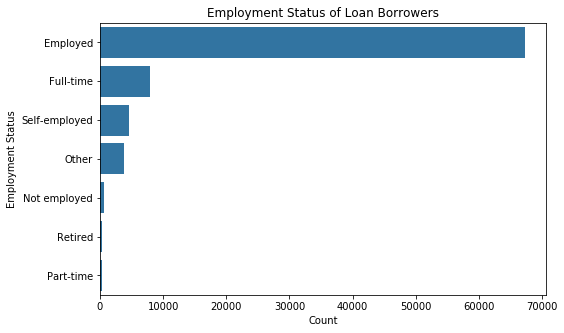

In [4]:
# Setting the order for plot
order = loan_target.EmploymentStatus.value_counts().index

# Plotting the Plot
plt.figure(figsize = [8, 5])
sb.countplot(data = loan_target, y = 'EmploymentStatus', color = base_color, order = order);
plt.xlabel('Count');
plt.ylabel('Employment Status');
plt.title('Employment Status of Loan Borrowers');

## Stated Monthly Income

> **Stated Monthly Income**
- With a boundary of mean and 2 times standard deviation, distribution of stated monthly income still has high right skewness.
- Any how, now one can infer that the mode of data is nearly to 5000.

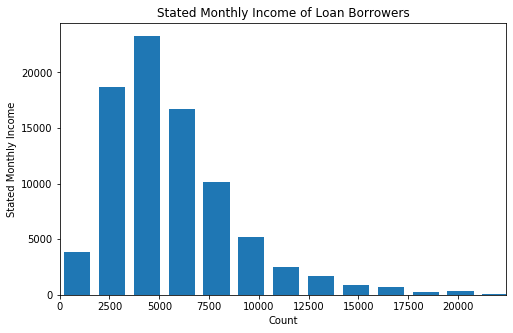

In [5]:
# Calculating the boundry for better visulization 
smi_std = loan_target.StatedMonthlyIncome.std()
smi_mean = loan_target.StatedMonthlyIncome.mean()
smi_boundary = smi_mean + smi_std * 2
smi_std, smi_mean, smi_boundary, len(loan_target[loan_target.StatedMonthlyIncome >= smi_boundary])

# Plotting the Plot
plt.figure(figsize = [8, 5])
plt.hist(data=loan_target, x='StatedMonthlyIncome', bins=1000, rwidth=0.75);
plt.xlim(0, smi_boundary);
plt.xlabel('Count');
plt.ylabel('Stated Monthly Income');
plt.title('Stated Monthly Income of Loan Borrowers');

## Loan Status

> **Loan Status**
- Second highest majority in Loan Status is of Completed ones in the data set.
- In the data set, Loan Status with Current are the highest ones. 
- Chargedoff loan also have substantial amount.
- Past due loans are categorized in several groups on the basis of length of payment delay.

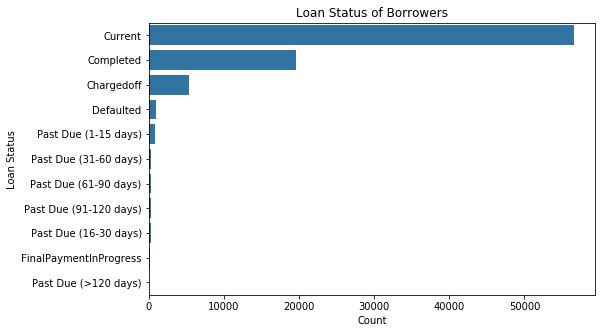

In [6]:
# Setting the order for plot
order = loan_target.LoanStatus.value_counts().index

# Plotting the Plot
plt.figure(figsize = [8, 5])
sb.countplot(data = loan_target, y = 'LoanStatus', color = base_color, order = order);
plt.xlabel('Count');
plt.ylabel('Loan Status');
plt.title('Loan Status of Borrowers');

In [7]:
# All Loan Statuses except 'Current' type
loan_target = loan_target[(loan_target.LoanStatus != 'Current')]

# Top 5 most frequent key pair-values of 'ListingCategoryNumeric' col
categories = {1 : 'Debt Consolidation', 7 : 'Other', 2 : 'Home Improvement',
              3 : 'Business', 6 : 'Auto'}

def to_defaulted(val):
    '''
    Take any Dataframe and checks if the specific column has 
    these values in each record, if not it will change it.
    '''
    if val.LoanStatus == 'Completed':
        return val.LoanStatus
    else:
        return 'Defaulted'

    
def categorize(val):
    '''
    Take any Dataframe and checks if the specific column has 
    these values in each record, if not it will change it.
    '''
    loan_cat = val.ListingCategoryNumeric
    if  loan_cat in categories:
        return categories[loan_cat]
    else:
        return categories[7]

# Applying the function 
loan_target.LoanStatus = loan_target.apply(to_defaulted, axis=1)
loan_target.ListingCategoryNumeric = loan_target.apply(categorize, axis=1)

## Loan Status & Prosper Rating

> **Loan Status & Prosper Rating**
- Rating 'D' is the most frequent one in both 'Completed' and 'Defaulted' statuses.
- Rating 'AA' is the least frequent one in both 'Completed' and 'Defaulted' statuses.

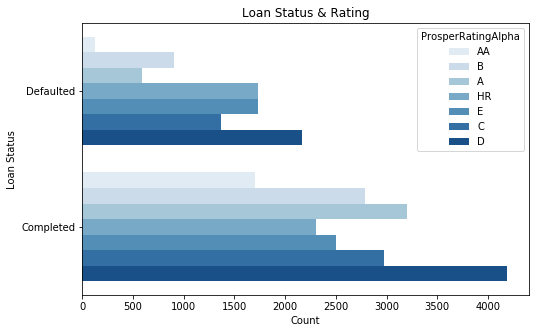

In [8]:
# Setting the order for plot
order = loan_target.ProsperRatingAlpha.value_counts(ascending=True).index

# Plotting the Plot
plt.figure(figsize = [8, 5])
sb.countplot(data = loan_target, y = 'LoanStatus', 
             hue = 'ProsperRatingAlpha', palette = 'Blues', 
             hue_order=order);
plt.xlabel('Count');
plt.ylabel('Loan Status');
plt.title('Loan Status & Rating');

## Employment Status & Prosper Rating

> **Employment Status & Prosper Rating**
- Lower Ratings seem to have greater proportions of individuals with employment statuses 'Self-employed', 'Not employed', 'Retired' and 'Part-time'.

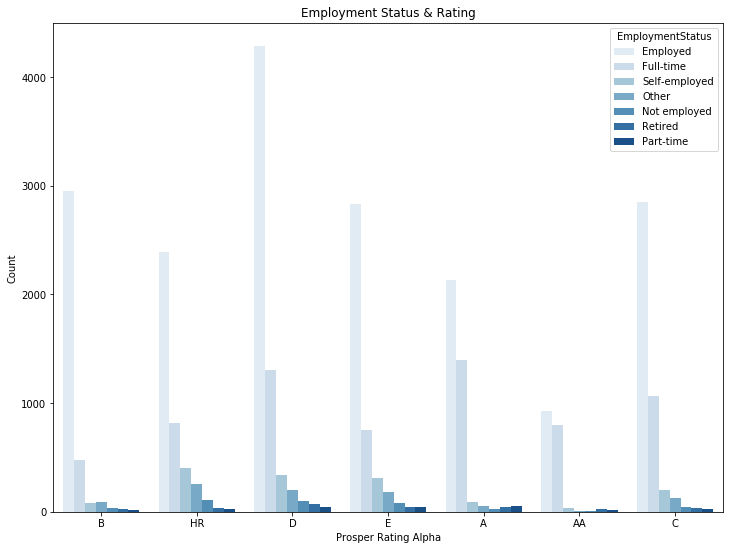

In [9]:
# Setting the order for plot
order = loan_target.EmploymentStatus.value_counts(ascending=False).index

# Plotting the Plot
plt.figure(figsize = [12, 9])
sb.countplot(data = loan_target, x = 'ProsperRatingAlpha', 
             hue = 'EmploymentStatus', palette = 'Blues', 
             hue_order=order);
plt.xlabel('Prosper Rating Alpha');
plt.ylabel('Count');
plt.title('Employment Status & Rating');

## Loan Status & Loan Amount

> **Loan Status & Loan Amount**
- Completed credits tend to be smaller incomparison to Defaulted credits ones.
- Loans of amount more than USD25000/- ones belong to Completed credits mostly. On the other hand, very few Defaulted credits are of amount more than USD25000/-.

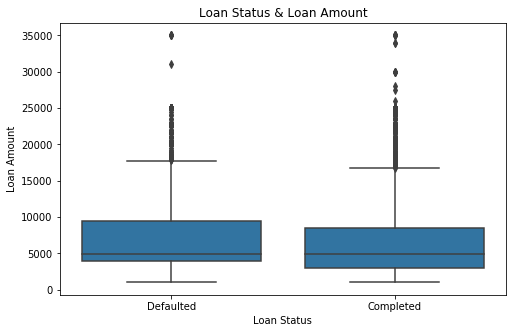

In [10]:
# Plotting the Plot
plt.figure(figsize = [8, 5])
sb.boxplot(data = loan_target, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color);
plt.xlabel('Loan Status');
plt.ylabel('Loan Amount');
plt.title('Loan Status & Loan Amount');

## Loan Status & Listing Category

> **Loan Status & Listing Category**
>
> - 'Debt Consolidation' is the most frequent category of all the time in Completed credits as well as Defaulted credits.

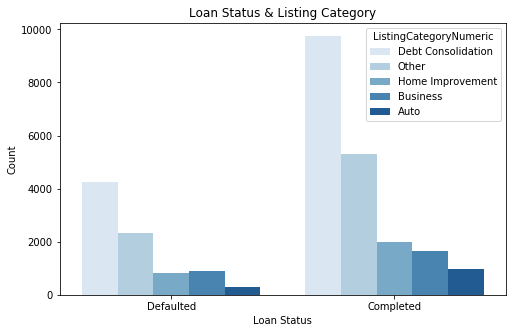

In [11]:
# Setting the order for plot
order = loan_target.ListingCategoryNumeric.value_counts().index

# Plotting the Plot
plt.figure(figsize = [8, 5])
sb.countplot(data = loan_target, x = 'LoanStatus', 
             hue = 'ListingCategoryNumeric', palette = 'Blues', 
             hue_order=order);
plt.xlabel('Loan Status');
plt.ylabel('Count');
plt.title('Loan Status & Listing Category');

## Rating, Loan Amount & Loan Status

> **Rating, Loan Amount & Loan Status**
- Most of the defaulted credits comes from individuals with low Prosper rating.
- Defaulted credits tend to be larger than completed ones, except the lowest ratings.

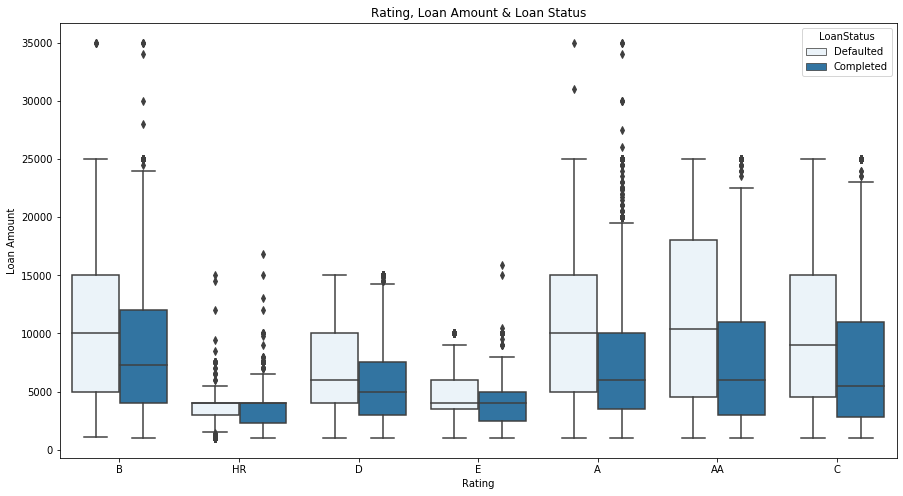

In [12]:
# Plotting the Plot
plt.figure(figsize = [15, 8])
sb.boxplot(data = loan_target, x = 'ProsperRatingAlpha', y = 'LoanOriginalAmount',
           hue = 'LoanStatus', color=base_color);
plt.xlabel('Rating');
plt.ylabel('Loan Amount');
plt.title('Rating, Loan Amount & Loan Status');

## Category, Loan Amount & Loan Status

> **Category, Loan Amount & Loan Status**
- Debt Consolidation and Other category tend to have larger amount.

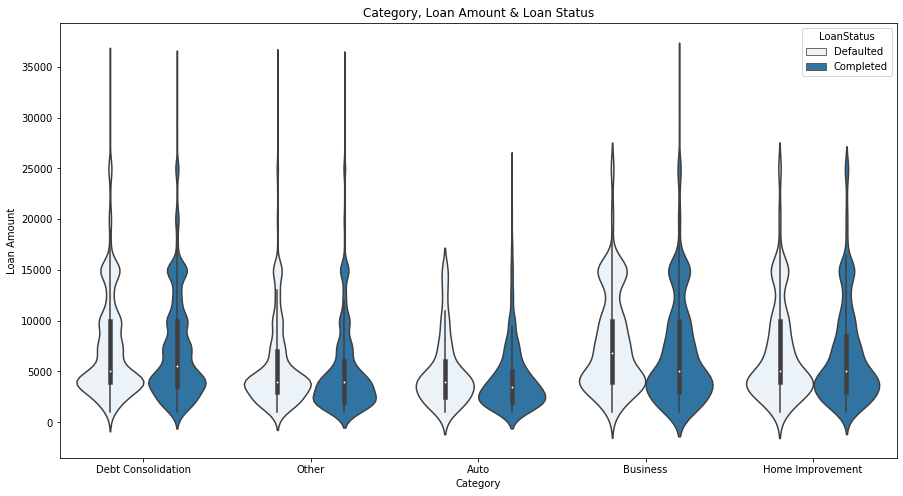

In [13]:
# Plotting the Plot
plt.figure(figsize = [15, 8])
sb.violinplot(data=loan_target, x='ListingCategoryNumeric', y='LoanOriginalAmount',
              hue='LoanStatus', color=base_color);
plt.xlabel('Category');
plt.ylabel('Loan Amount');
plt.title('Category, Loan Amount & Loan Status');

## Rating, Category & Loan Status

> **Rating, Category & Loan Status**
- There is no substantial difference for default rates in different categories broken up by ratings. 
- There are 5 graphs in the second one has much up and downs in it other than all of them.

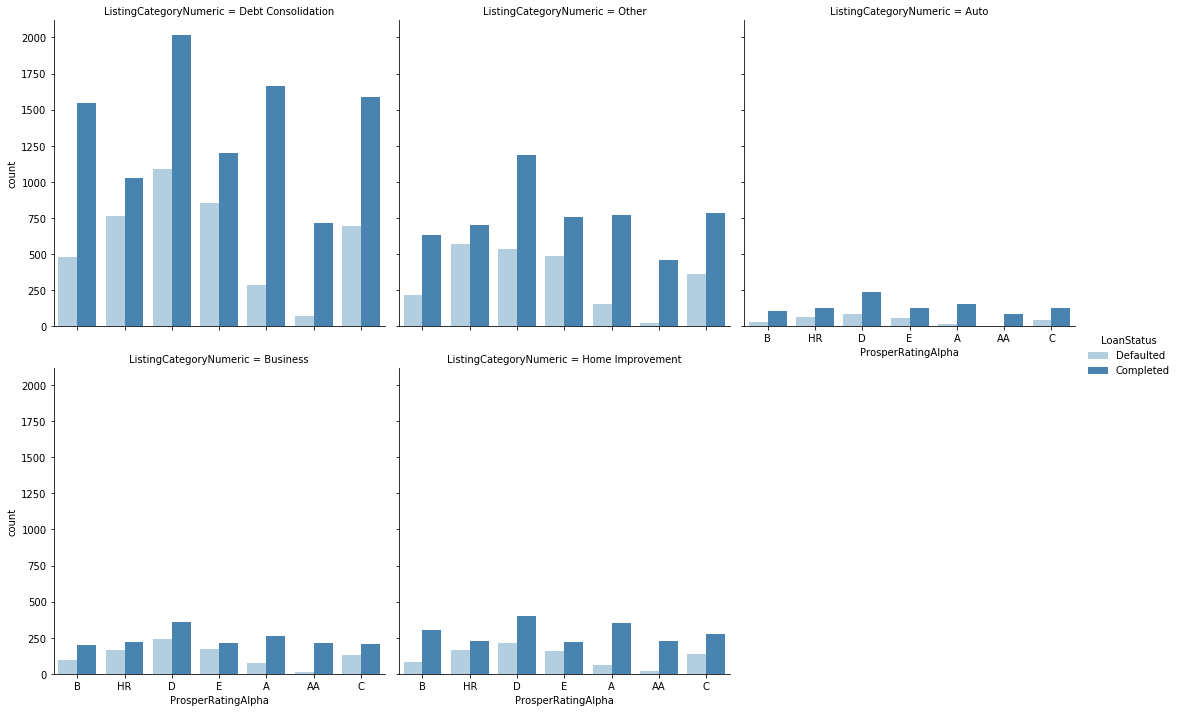

In [14]:
# Plotting the Plot
sb.catplot(x = 'ProsperRatingAlpha', hue = 'LoanStatus', col = 'ListingCategoryNumeric',
           data = loan_target, kind = 'count', palette = 'Blues', col_wrap = 3);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle